In [1]:
import os
import glob
import pandas as pd


df = pd.read_csv("C:\\Users\\evany_cdhq038\\OneDrive\\Desktop\\FinishedExcelEikon\\allEikonExcelAggregated.csv")
yearlist = [str(date)[:4] for date in df["PDFName"]]
#print(yearlist)
df["Year"]=yearlist

In [5]:
years=list(set(df["Year"]))

years.sort()
years=years[:-1] #removes "na"
print(years)

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [6]:
contributorList=[]


for year in years:
    yearDF=df[df["Year"]== year]
    storage=yearDF["Contributor"].value_counts()
    contributorList.append(storage)
    

In [7]:
#testing intersection
consistentContributors= set.intersection(*[set(list.index) for list in contributorList])
print(len(consistentContributors))

76


In [8]:
allCounts=df["Contributor"].value_counts()

df2 = allCounts[allCounts.index.isin(consistentContributors)]
topTen=df2.head(10)

print(topTen)

JPMorgan                       100194
RBC Capital Markets             89311
Wells Fargo Securities, LLC     82186
Credit Suisse                   77303
UBS Equities                    64909
Jefferies                       64370
Deutsche Bank                   57182
Cowen and Company               56302
EVERCORE ISI                    47741
Piper Sandler Companies         45517
Name: Contributor, dtype: int64


In [10]:
df.head()

,Available,Date,Prim. Ticker,Second. Ticker,Title,Pages,Contributor,RI,Price,Doc Grp,...,Relevance,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,DatePDFName,Year
0,2016-11-24 00:00:00,2016-11-17 00:00:00,TEAM.OQ,NaN,Atlassian Corporation Plc:Positive Takeaways F...,5,William Blair & Company,NaN,34.5,Inv.,...,NaN,76463545,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-11-17-TEAM.OQ-William Blair Comp-Atlassi...,.\000165_AMFD\16\11\2016-11-17-TEAM.OQ-William...,1,2016-11-17,2016
1,2016-11-22 00:00:00,2016-11-15 00:00:00,"TEAM.OQ, ASH.N, CHS.N, NTNX.OQ, THS.N","ASH.N, CHS.N, NTNX.OQ, THS.N","KBCM: CHS (-Downgrade), JWN/GPS/QVCA (+), THS ...",10,KeyBanc Capital Markets Inc.,Ini,103.5,Inv.,...,NaN,76439187,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-11-15-TEAM.OQ-KeyBanc Capital Mark-KBCM C...,.\000165_AMFD\16\11\2016-11-15-TEAM.OQ-KeyBanc...,1,2016-11-15,2016
2,2016-11-11 00:00:00,2016-10-28 00:00:00,TEAM.OQ,NaN,Atlassian Corporation PLC - Some Moving Parts ...,7,BTIG,Estimate Increase,34.5,Inv.,...,NaN,76200137,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-28-TEAM.OQ-BTIG-Atlassian Corporation ...,.\000165_AMFD\16\10\2016-10-28-TEAM.OQ-BTIG-At...,1,2016-10-28,2016
3,2016-11-04 00:00:00,2016-10-28 00:00:00,TEAM.OQ,NaN,Atlassian Corporation PLC: 1Q17 Results: Is Gu...,15,Morgan Stanley,NaN,220.0,Inv.,...,NaN,76193440,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-28-TEAM.OQ-Morgan Stanley-Atlassian Co...,.\000165_AMFD\16\10\2016-10-28-TEAM.OQ-Morgan ...,1,2016-10-28,2016
4,2016-11-03 00:00:00,2016-10-27 00:00:00,TEAM.OQ,AMZN.OQ,Atlassian: TEAM: BUY: Beautiful Norm,15,Jefferies,Ini,115.0,Inv.,...,NaN,76191978,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-27-TEAM.OQ-Jefferies-Atlassian TEAM BU...,.\000165_AMFD\16\10\2016-10-27-TEAM.OQ-Jefferi...,1,2016-10-27,2016


In [18]:

with pd.ExcelWriter("contributorList.xlsx") as writer:
    startYear=2012
    for item in contributorList:
        print(startYear)
        print(item)
        item.to_excel(writer,sheet_name=str(startYear))
        startYear+=1

2012
JPMorgan                       8025
BofA Global Research           7533
Barclays                       7363
Wells Fargo Securities, LLC    6941
Credit Suisse                  6822
                               ... 
Maison Placements Canada          1
EL&C Baillieu                     1
CSC Securities                    1
Collins Stewart Europe            1
ESN                               1
Name: Contributor, Length: 240, dtype: int64
2013
Wells Fargo Securities, LLC           8123
RBC Capital Markets                   8076
JPMorgan                              7806
Barclays                              7705
BofA Global Research                  7423
                                      ... 
Nirmal Bang Institutional Equities       1
Planner Corretora de Valores S/A         1
NBK Capital                              1
Phoenix Partners Group                   1
MDB Capital Group                        1
Name: Contributor, Length: 226, dtype: int64
2014
RBC Capital Markets       

In [20]:
for item in contributorList:
    print(len(item))

240
226
220
247
221
194
195
178
200
177
165
199


In [57]:
skippeddf=pd.read_csv("skipped.csv")
years=list(set(skippeddf["skippedYear"]))
years.sort()
numSkipped=[]


def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

for year in years:
    yearDF=skippeddf[skippeddf["skippedYear"]== year]
    print(year)
    skippedList=set(yearDF["tic"])
    print(skippedList)
    numSkipped.append(len(skippedList))

2012
{nan, 'RSIS', 'WCFB', 'SYB', 'VRTS', 'OLN', 'IO', 'JNS', 'INLD', 'ICFI', 'CRS', 'WHIT', 'VC', 'HTZ', 'RDTA', 'EFCW', 'TACO', 'GTST', 'ETV', 'CATZ', 'TLIO', 'MSG', 'GADZ', 'SCBI', 'TLIC', 'ATH', 'SEQU', 'Z', 'CSTR', 'USMO', 'ANTC', 'IEX', 'JPM', 'ICGE', 'EOG', 'AH', 'TNS', 'META', 'GET', 'GLW', 'IMGK', 'WPIC', 'TMAX', 'WCIC', 'PATR', 'SSSW', 'PRFT', 'PABN', 'HRG', 'AFFX', 'JKHY', 'METG', 'EXBD', 'CRDC', 'PPHM', 'SPN', 'USBE', 'RMDY', 'CDC', 'TSII', 'MIKN', 'RXTC', 'PDII', 'SAG', 'SPNW', 'CIEN', 'SBAC', 'SPDY', 'SOTA', 'TCHC', 'SMCI', 'WTLC', 'CSIN', 'TZYM', 'STCS', 'ICE', 'VCLK', 'ODSI', 'SRGN', 'BWC', 'SJK', 'TTO', 'ZHNE', 'WSBF', 'WLP', 'TUI', 'MGNC', 'NETP', 'CCRT', 'SYRG', 'ODMO', 'SCG', 'DHR', 'ATRM', 'USW', 'EXLS', 'TTES', 'AHSI', 'OXBT', 'PBHC', 'FDX', 'MBLY', 'MFSF', 'TSPT', 'VCI', 'TMK', 'WPS', 'OWAV', 'TPCG', 'BDC', 'CFDY', 'ZLCS', 'PMS', 'VISG', 'NCST', 'SKH', 'CIBC', 'WEBT', 'VTI', 'REGI', 'CYSP', 'WFD', 'UGNE', 'JDSU', 'NHLI', 'BMY', 'LFUS', 'RMII', 'RGR', 'SHNS', 'UNT

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[455, 342, 661, 490, 311, 291, 283, 290, 312, 472, 642]


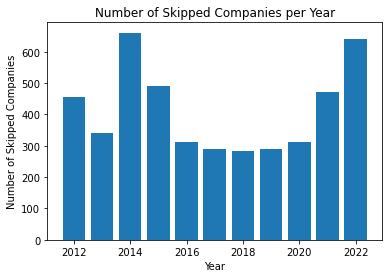

In [44]:
import matplotlib.pyplot as plt

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

plt.bar(years,numSkipped)
plt.title('Number of Skipped Companies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Skipped Companies')
#add_value_label(years,numSkipped)
print(years)
print(numSkipped)
plt.show()


In [ ]:
#randombelow

In [31]:
test= skippeddf[skippeddf["skippedYear"]== 2022]

In [32]:
tic=set(test["tic"])
print(len(tic))

642


In [34]:
print(numSkipped)

[455, 342, 661, 490, 311, 291, 283, 290, 312, 472, 642]


In [45]:
print(numSkipped)

[455, 342, 661, 490, 311, 291, 283, 290, 312, 472, 642]


In [56]:
string="2012: "
string.join(list(skippedList)[1:])
print(string)

2012: 


In [55]:
print(list(skippedList)[-1])

TENT
